<a href="https://colab.research.google.com/github/Hamza1122/DNNRegressor/blob/main/Untitled187.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import math
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from sklearn.model_selection import train_test_split
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
from matplotlib import pyplot as plt

Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
data = pd.read_csv('data.csv')
data.head()

type  QP  PLR  MBL       MOS
0     1  16  0.1  1.0  4.694668
1     1  16  0.1  2.5  4.532094
2     1  16  0.1  5.0  4.341019
3     1  16  0.1  7.5  4.141729
4     1  16  1.0  1.0  4.497566

In [3]:
Y=data['MOS']
X=data.drop(['MOS'],axis=1)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, Y , test_size=0.2, random_state = 4)

In [5]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(data=scaler.transform(X_train),columns = X_train.columns,index=X_train.index)
X_test = pd.DataFrame(data=scaler.transform(X_test),columns = X_test.columns,index=X_test.index)

In [6]:
x1 = tf.feature_column.numeric_column('type')
x2 = tf.feature_column.numeric_column('QP')
x3 = tf.feature_column.numeric_column('PLR')
x4 = tf.feature_column.numeric_column('MBL')
feat_cols = [x1,x2,x3,x4]

In [7]:
input_func = tf.estimator.inputs.pandas_input_fn(x=X_train,y=y_train ,batch_size=10,num_epochs=1000,shuffle=True)

In [8]:
def wx_input_fn(X, y=None, num_epochs=None, shuffle=True, batch_size=400):
    return tf.estimator.inputs.pandas_input_fn(x=X,
                                               y=y,
                                               num_epochs=num_epochs,
                                               shuffle=shuffle,
                                               batch_size=batch_size)

In [9]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error


def truncate(number, digits) -> float:
  stepper = 10.0 ** digits
  return math.trunc(stepper * number) / stepper


def build_model(optimizer):
  model = tf.estimator.DNNRegressor(hidden_units=[60,60,60,60],feature_columns=feat_cols,optimizer=optimizer,
                                 activation_fn = tf.nn.relu)
  
  predict_input_func = tf.estimator.inputs.pandas_input_fn(
      x=X_test,
      batch_size=10,
      num_epochs=1,
      shuffle=False)
  
  evaluations = []
  STEPS = 400
  for i in range(100):
    model.train(input_fn=wx_input_fn(X_train, y=y_train), steps=STEPS)
    evaluations.append(model.evaluate(input_fn=wx_input_fn(X_test,
                                                               y_test,
                                                               num_epochs=1,
                                                               shuffle=False)))
    

  pred_gen = model.predict(predict_input_func)
  predictions = list(pred_gen)
  final_preds = []
  for pred in predictions:
    final_preds.append(pred['predictions'])  

  print('Mean Square Error',mean_squared_error(final_preds,y_test)**0.5)
  print('R2 score:',r2_score(y_test,final_preds))   

  print('Mean Absolute Error',mean_absolute_error(y_test,final_preds))
  predictions = []
  for i in final_preds:
    predictions.append(i[0])

  true_values = y_test.values.tolist()

   # model predictions
  print('prediction ---- true\n')
  for i in range(len(final_preds)):
    print("%f ------- %f" %(truncate(predictions[i],5), true_values[i]))
   

  plt.plot(y_test, final_preds, '*g')
  for i in range(len(true_values)):
    plt.plot(true_values[i],true_values[i],'*r')
  plt.figure()

  plt.scatter(y_test, final_preds, color='red')
  plt.plot(y_test, y_test,color='blue', linewidth=3)
  plt.figure()
 
  return evaluations 

Adam Optimizer
INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmp_acqafiv', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
Instructions for updating:
Use Variable.read_value. Variables in 2

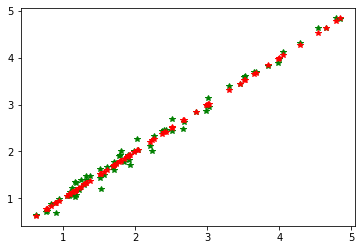

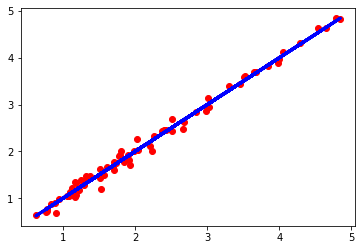

<Figure size 432x288 with 0 Axes>

In [10]:
print('Adam Optimizer')
adam_history = build_model(optimizer=tf.train.AdamOptimizer(learning_rate=0.01))

SGD Optimizer
INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpn6vef9c0', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling mode

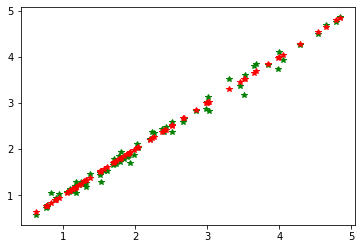

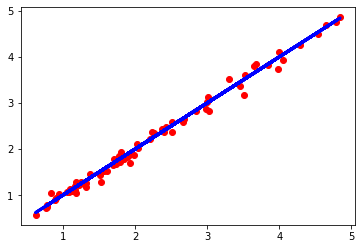

<Figure size 432x288 with 0 Axes>

In [11]:
print('SGD Optimizer')
sgd_history = build_model(optimizer=tf.train.GradientDescentOptimizer(learning_rate=0.0001))

Adagrad Optimizer
INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpavv664v4', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.
Instructions for updating:
Ca

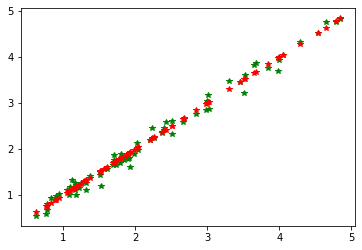

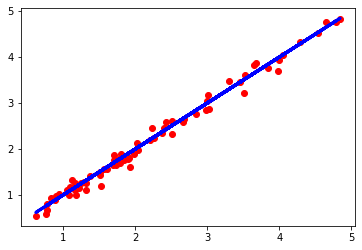

<Figure size 432x288 with 0 Axes>

In [12]:
print('Adagrad Optimizer')
adagrad_history = build_model(optimizer=tf.train.AdagradOptimizer(learning_rate=0.01))

Adadelta Optimizer
INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpyl6ojxf9', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling

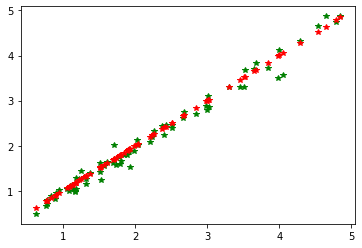

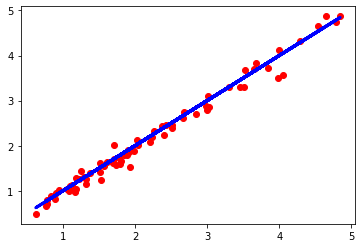

<Figure size 432x288 with 0 Axes>

In [13]:
print('Adadelta Optimizer')
adadelta_history = build_model(optimizer=tf.train.AdadeltaOptimizer(learning_rate=0.01))

RMSprop Optimizer
INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmp4513c2vk', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.
Instructions for updating:
Ca

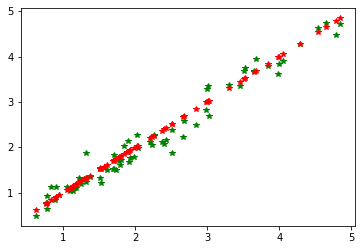

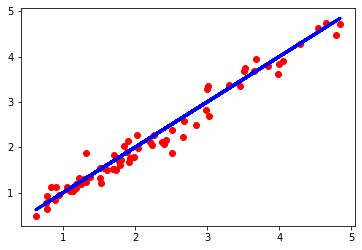

<Figure size 432x288 with 0 Axes>

In [14]:
print('RMSprop Optimizer')
rmsprop_history = build_model(optimizer=tf.train.RMSPropOptimizer(learning_rate=0.01))

Momentum Optimizer
INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpao0i7o4b', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling

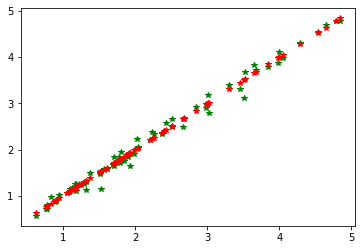

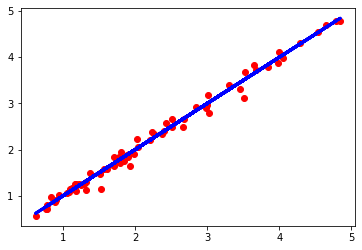

<Figure size 432x288 with 0 Axes>

In [15]:
print('Momentum Optimizer')
momentum_history = build_model(optimizer=tf.compat.v1.train.MomentumOptimizer(learning_rate=0.0001,momentum=0.1))

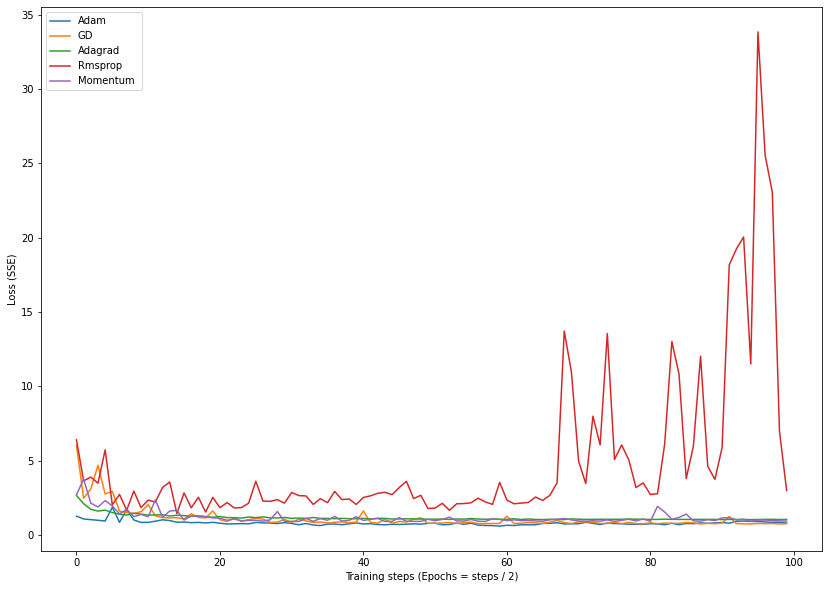

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

# manually set the parameters of the figure to and appropriate size
plt.rcParams['figure.figsize'] = [14, 10]

adam_loss_values = [ev['loss'] for ev in adam_history]
sgd_loss_values = [ev['loss'] for ev in sgd_history]
adagrad_loss_values = [ev['loss'] for ev in adagrad_history]
adadelta_loss_values = [ev['loss'] for ev in adadelta_history]
rmsprop_loss_values = [ev['loss'] for ev in rmsprop_history]

momentum_loss_values = [ev['loss'] for ev in momentum_history]

plt.plot(adam_loss_values)
plt.plot(sgd_loss_values)
plt.plot(adagrad_loss_values)
plt.plot(rmsprop_loss_values)
plt.plot(momentum_loss_values)

plt.xlabel('Training steps (Epochs = steps / 2)')
plt.ylabel('Loss (SSE)')
plt.legend(['Adam','GD','Adagrad','Rmsprop','Momentum '], loc='upper left')
plt.show()

Streaming output truncated to the last 5000 lines.
INFO:tensorflow:Saving checkpoints for 19600 into /tmp/tmpug8j_b2z/model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 19600...
INFO:tensorflow:loss = 0.0003306819, step = 19601
INFO:tensorflow:global_step/sec: 188.563
INFO:tensorflow:loss = 0.02128322, step = 19701 (0.532 sec)
INFO:tensorflow:global_step/sec: 223.142
INFO:tensorflow:loss = 0.0018979274, step = 19801 (0.453 sec)
INFO:tensorflow:global_step/sec: 195.711
INFO:tensorflow:loss = 0.00097033434, step = 19901 (0.511 sec)
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 20000...
INFO:tensorflow:Saving checkpoints for 20000 into /tmp/tmpug8j_b2z/model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 20000...
INFO:tensorflow:Loss for final step: 0.02157454.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-01-27T10:42:57Z
INFO:tensorflow:

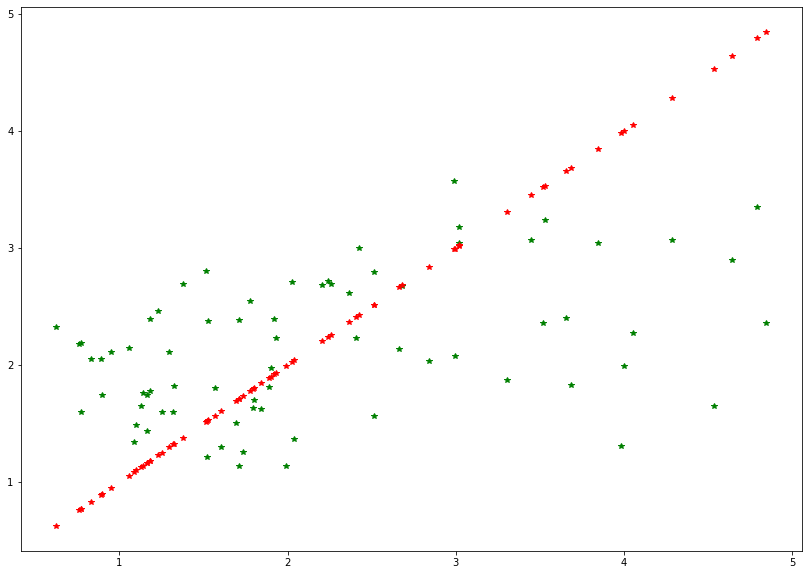

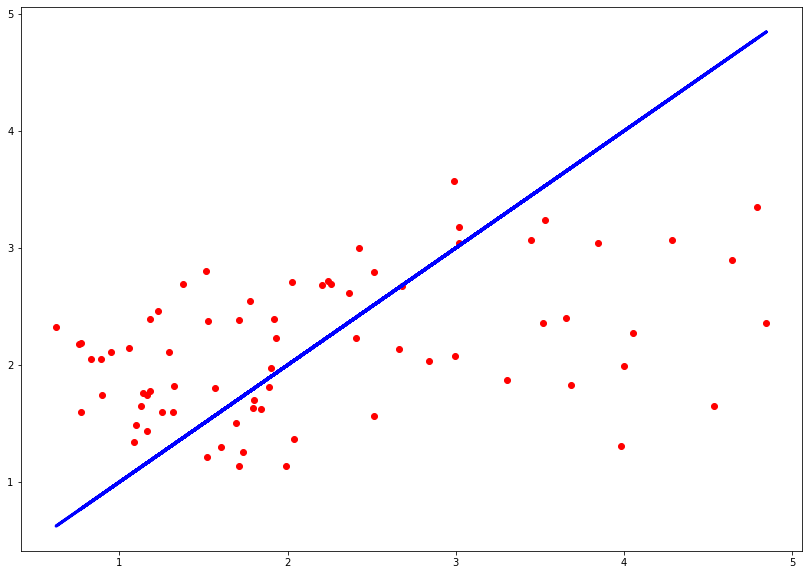

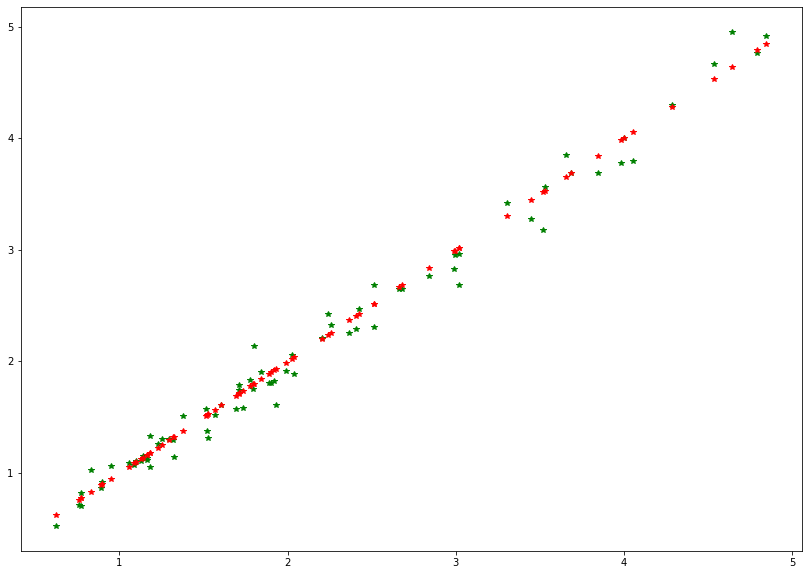

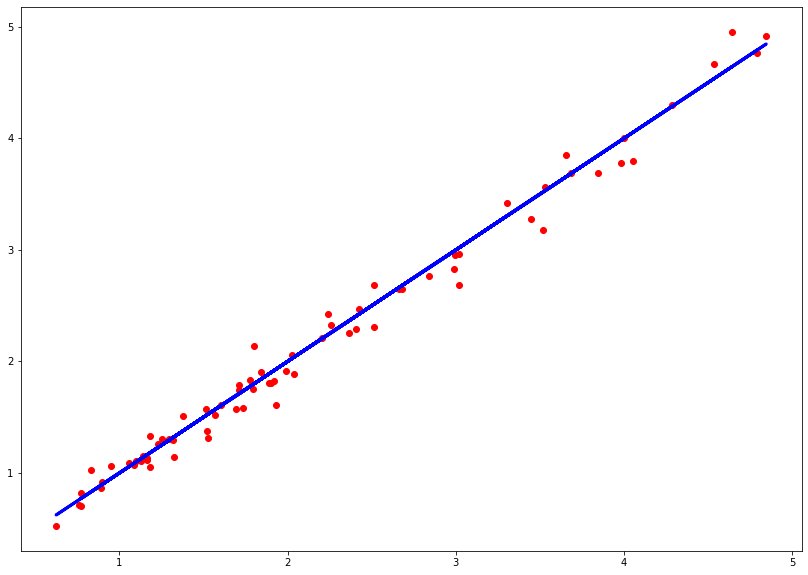

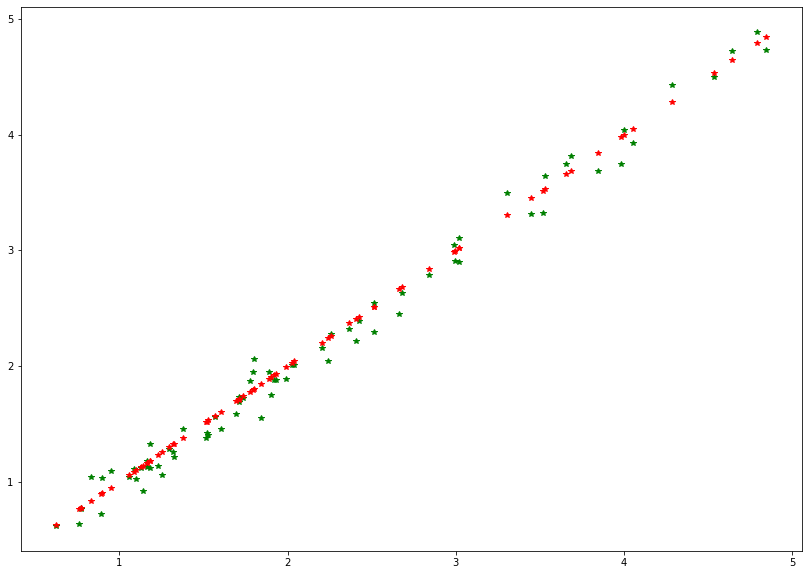

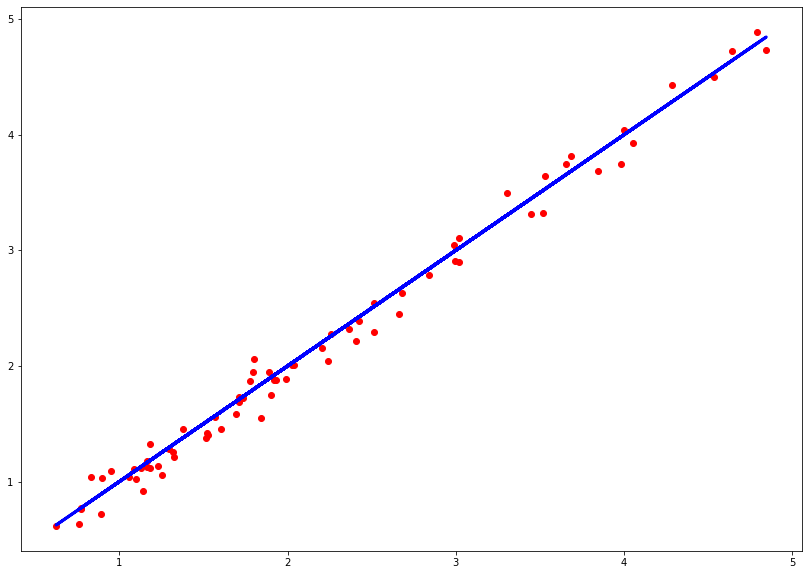

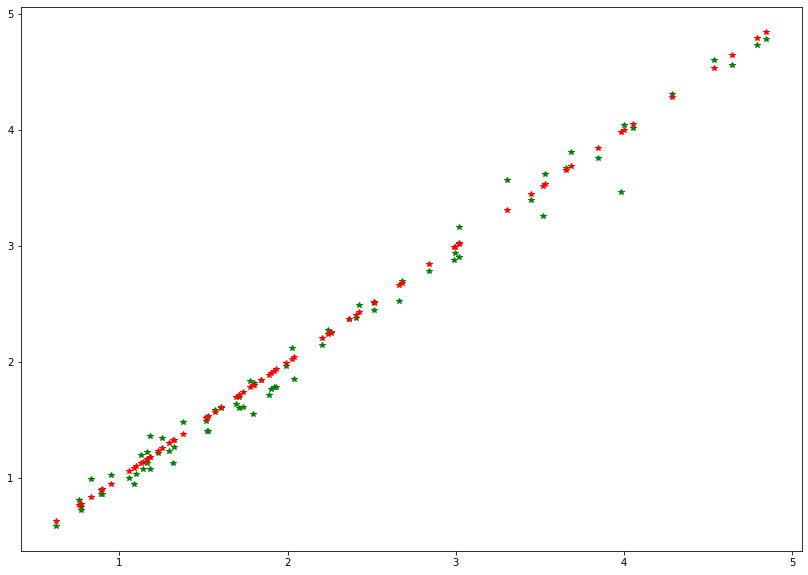

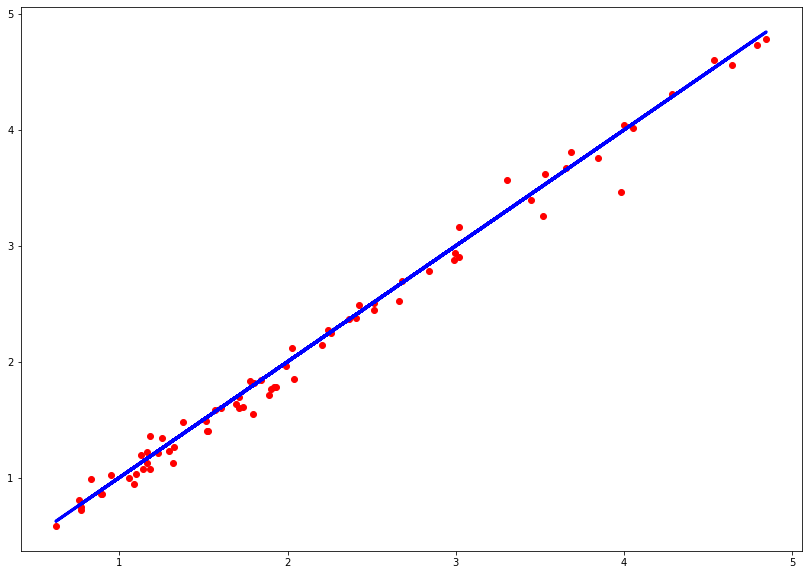

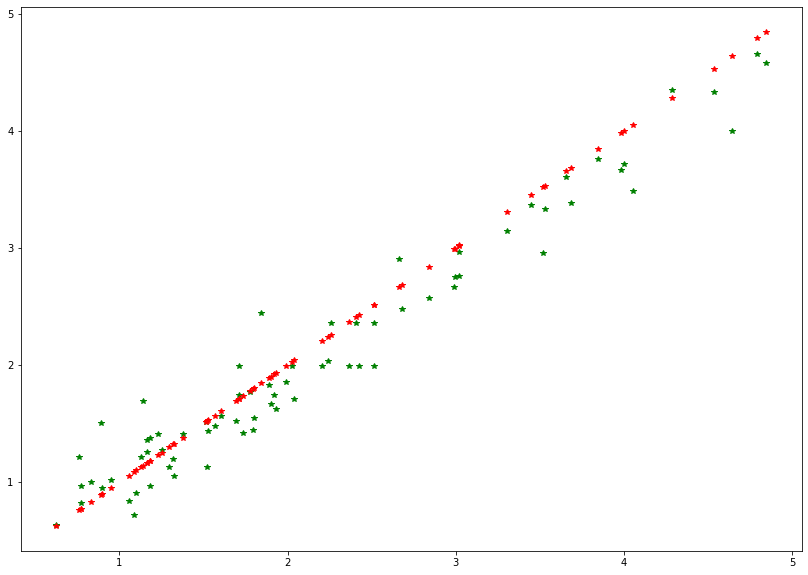

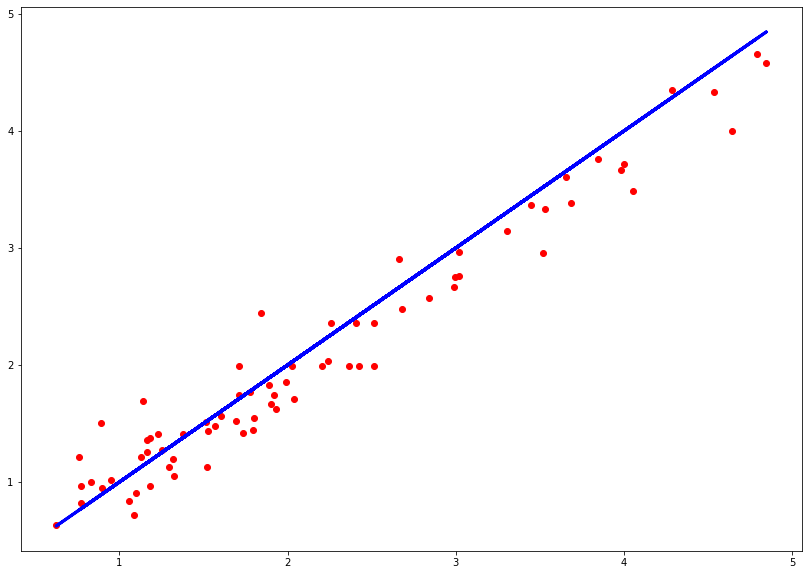

<Figure size 1008x720 with 0 Axes>

In [18]:
import time

print('Adam Optimizer Results')

lr_rate = [0.000001,0.00001,0.0001,0.001,0.1]

com_time = []

for x_rate in lr_rate:
  
  start_time = time.time()
  adam_history  = build_model(optimizer=tf.train.AdamOptimizer(learning_rate=x_rate))
  
  completion_time = time.time() - start_time
  com_time.append(completion_time)
  

Streaming output truncated to the last 5000 lines.
INFO:tensorflow:Saving checkpoints for 19600 into /tmp/tmp8479l9xu/model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 19600...
INFO:tensorflow:loss = 2.5597754, step = 19601
INFO:tensorflow:global_step/sec: 212.977
INFO:tensorflow:loss = 0.7613447, step = 19701 (0.471 sec)
INFO:tensorflow:global_step/sec: 219.708
INFO:tensorflow:loss = 3.2761734, step = 19801 (0.457 sec)
INFO:tensorflow:global_step/sec: 230.662
INFO:tensorflow:loss = 0.69306105, step = 19901 (0.435 sec)
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 20000...
INFO:tensorflow:Saving checkpoints for 20000 into /tmp/tmp8479l9xu/model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 20000...
INFO:tensorflow:Loss for final step: 0.9304817.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-01-27T12:50:39Z
INFO:tensorflow:Graph was f

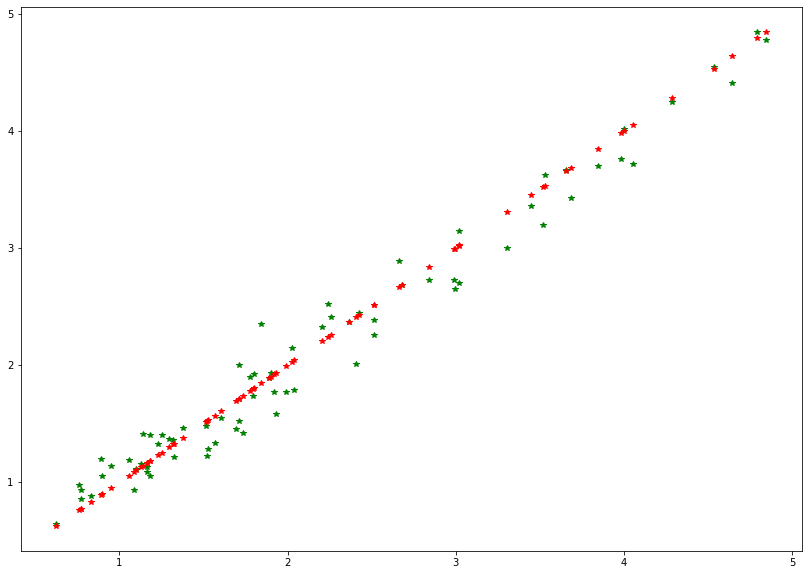

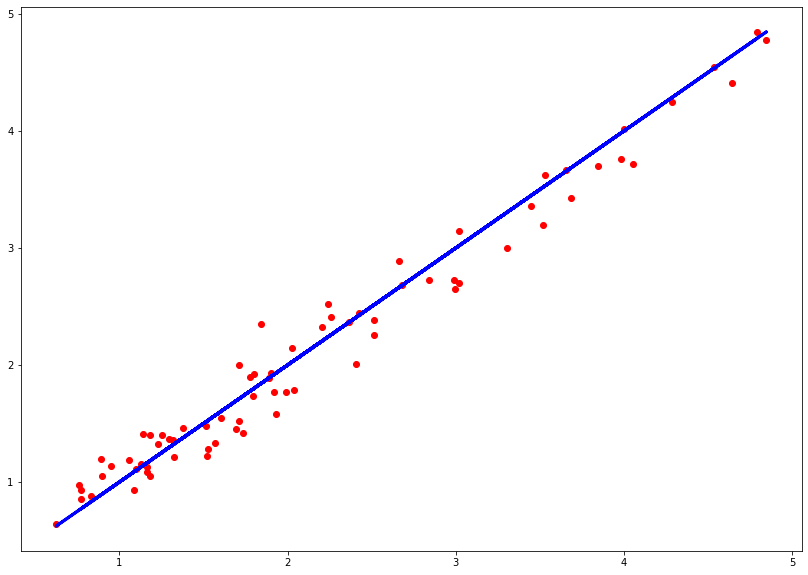

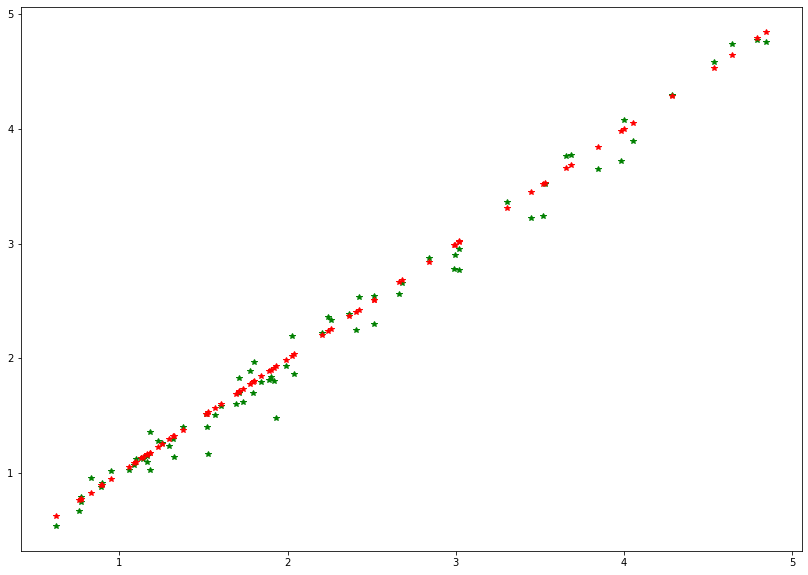

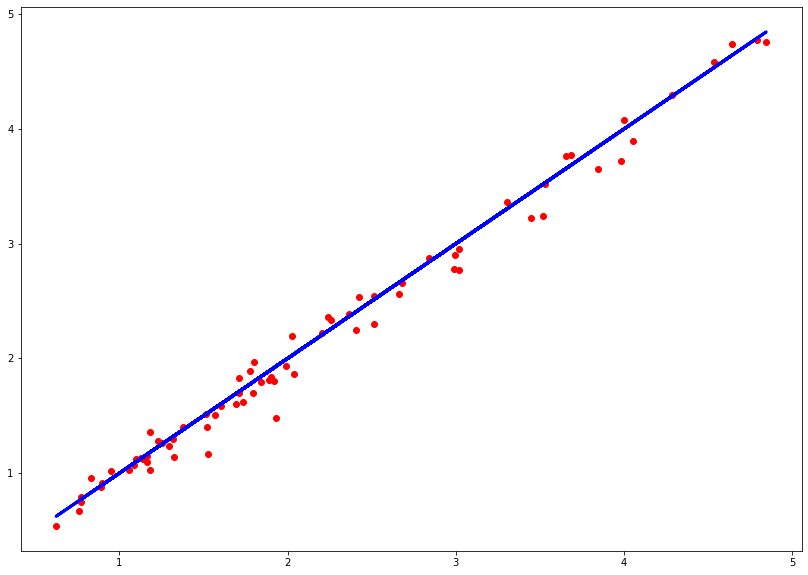

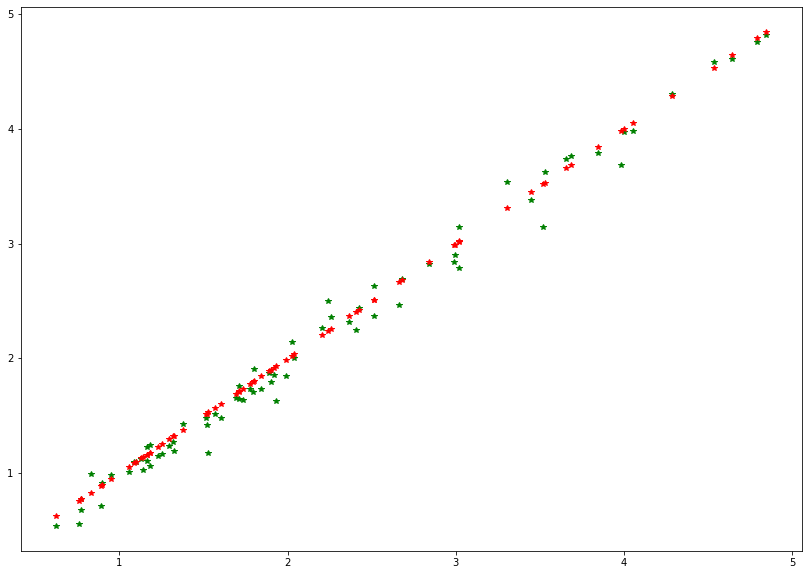

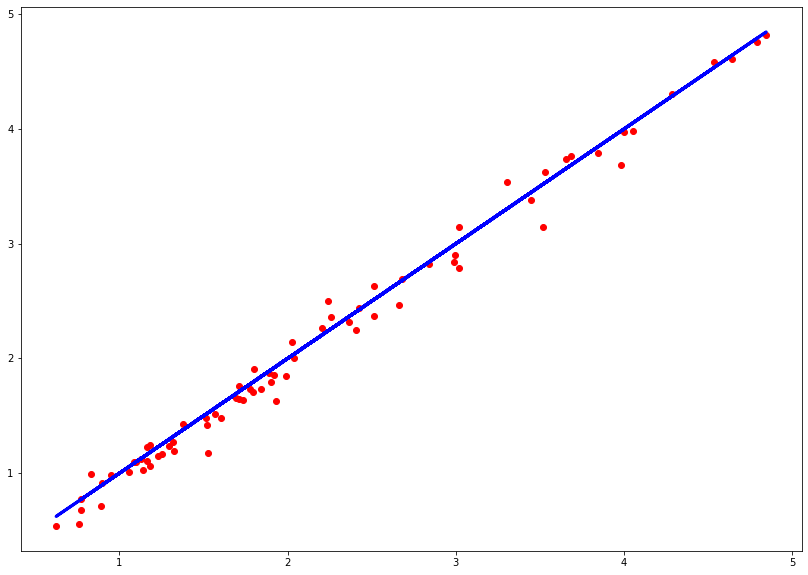

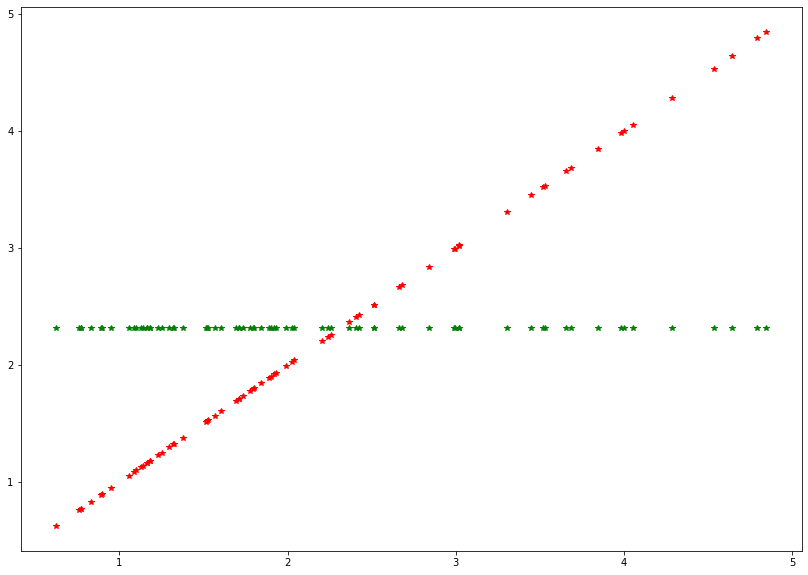

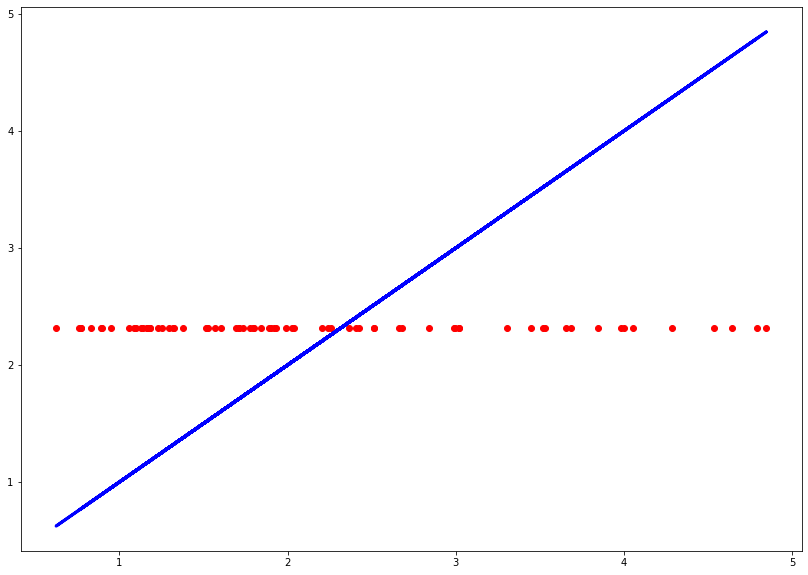

<Figure size 1008x720 with 0 Axes>

In [21]:
print('SGD Optimizer Results')

sgd_com_time = []

lr_rate_1 = [0.000001,0.00001,0.0001,0.001]

for x_rate in lr_rate_1:
  
  start_time = time.time()
  sgd_history  = build_model(optimizer=tf.train.GradientDescentOptimizer(learning_rate=x_rate))  
  completion_time = time.time() - start_time
  sgd_com_time.append(completion_time)


Streaming output truncated to the last 5000 lines.
INFO:tensorflow:Saving checkpoints for 19600 into /tmp/tmp44ua6se_/model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 19600...
INFO:tensorflow:loss = 4.384113, step = 19601
INFO:tensorflow:global_step/sec: 187.844
INFO:tensorflow:loss = 4.232499, step = 19701 (0.534 sec)
INFO:tensorflow:global_step/sec: 208.239
INFO:tensorflow:loss = 4.8232336, step = 19801 (0.480 sec)
INFO:tensorflow:global_step/sec: 194.935
INFO:tensorflow:loss = 4.0135775, step = 19901 (0.514 sec)
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 20000...
INFO:tensorflow:Saving checkpoints for 20000 into /tmp/tmp44ua6se_/model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 20000...
INFO:tensorflow:Loss for final step: 4.3021903.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-01-27T13:22:14Z
INFO:tensorflow:Graph was fina

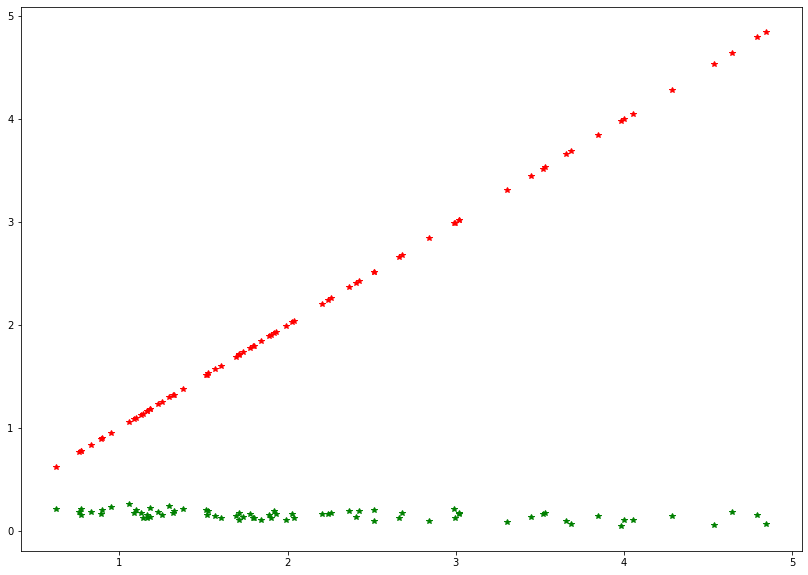

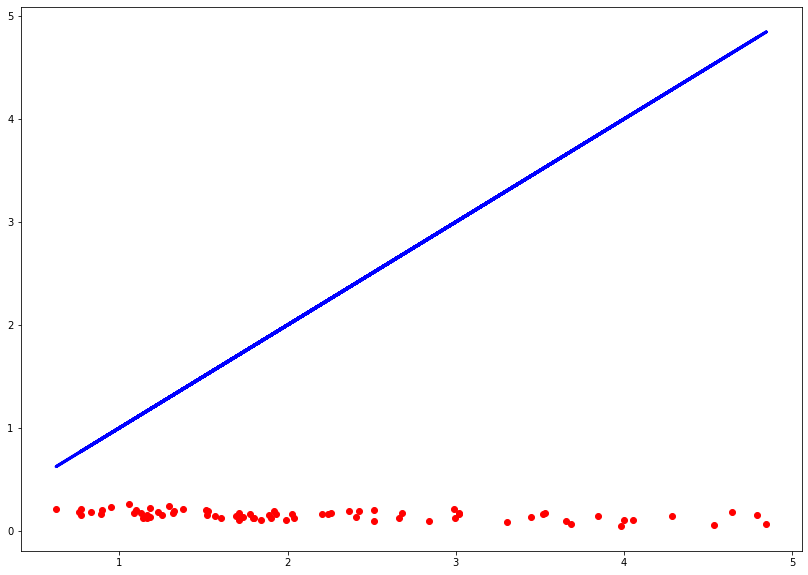

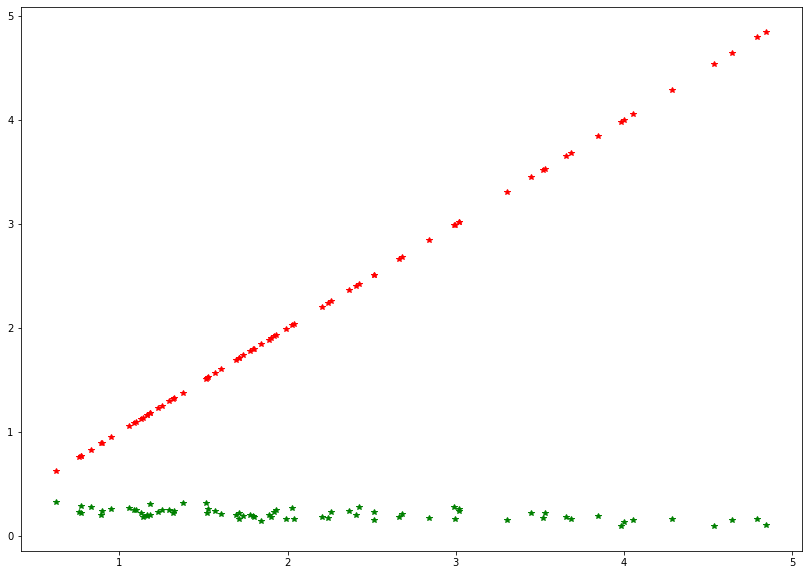

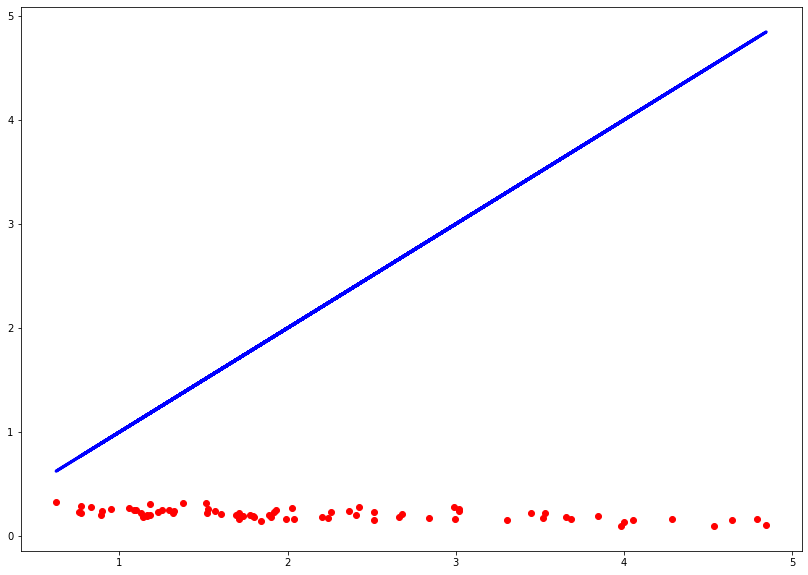

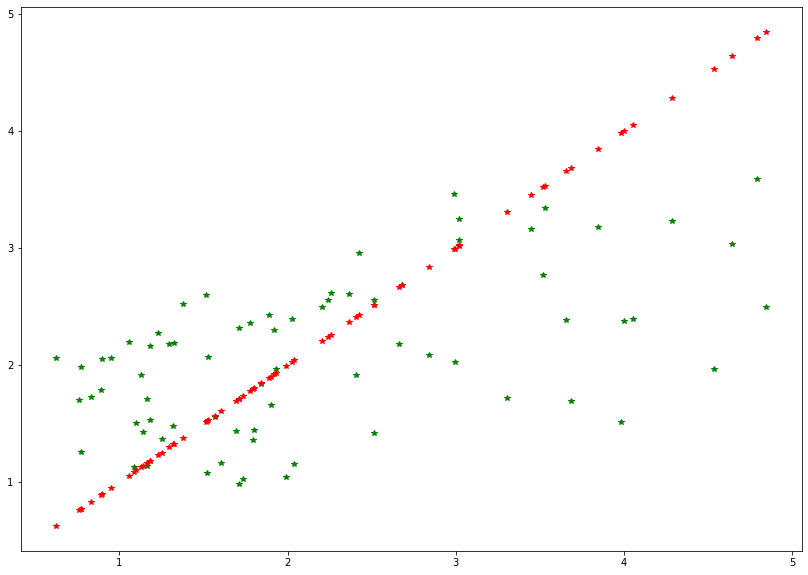

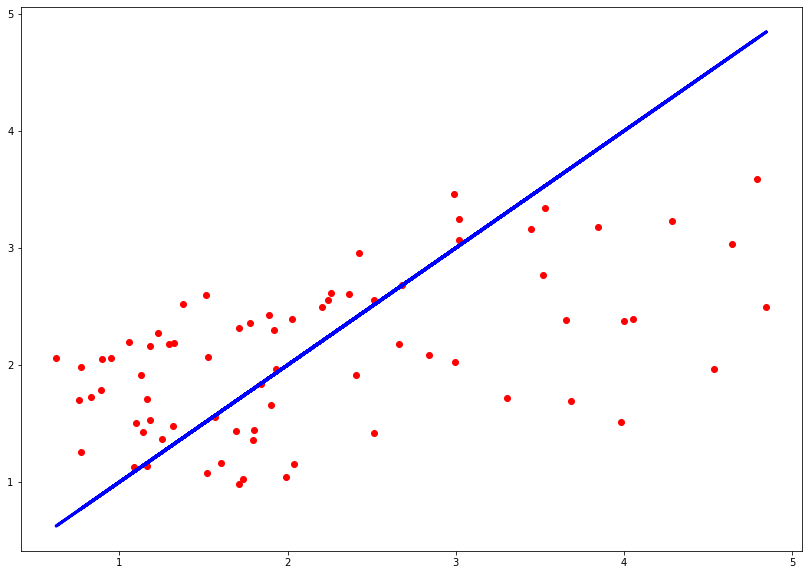

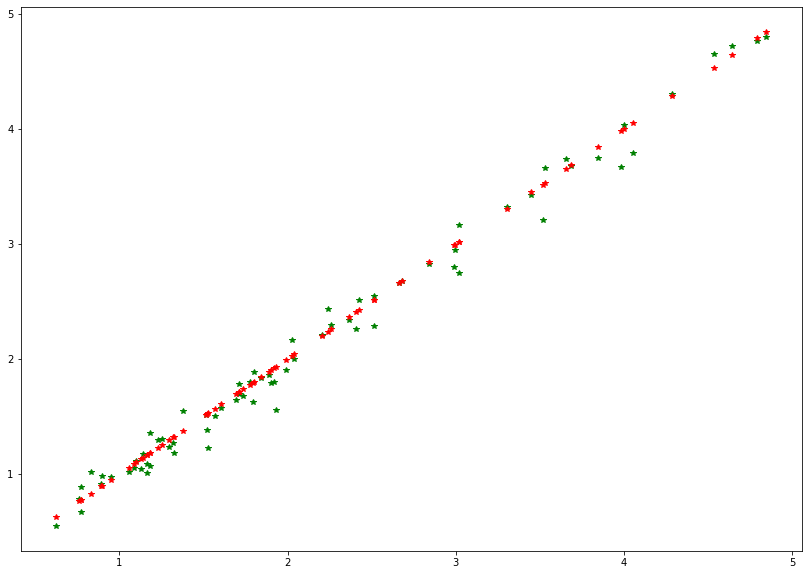

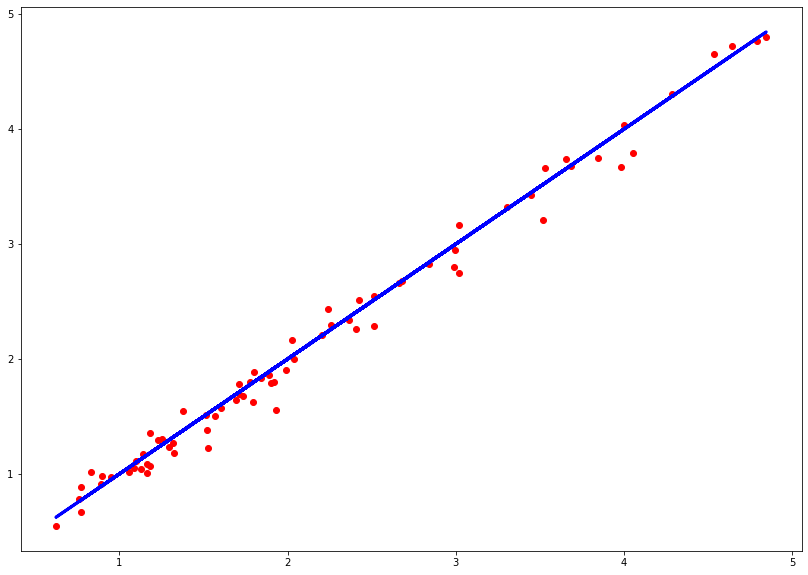

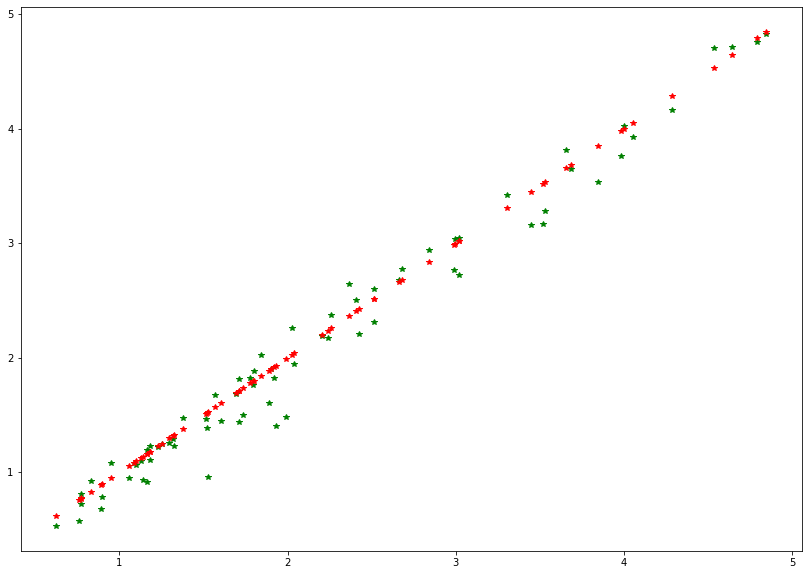

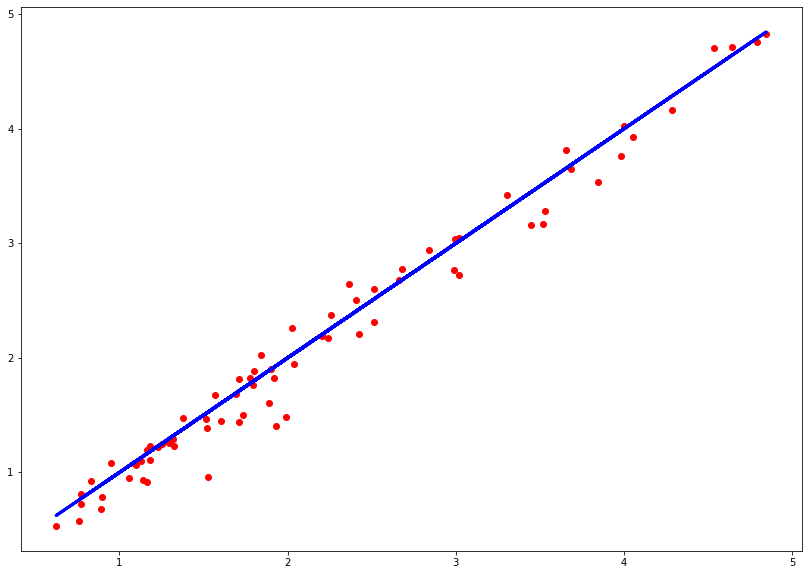

<Figure size 1008x720 with 0 Axes>

In [22]:
print('Adagrad Optimizer Results')

adagrad_com_time = []

for x_rate in lr_rate:
  
  start_time = time.time()
  adagrad_history  = build_model(optimizer=tf.train.AdagradOptimizer(learning_rate=x_rate))
  
  completion_time = time.time() - start_time
  adagrad_com_time.append(completion_time)


Streaming output truncated to the last 5000 lines.
INFO:tensorflow:Saving checkpoints for 19600 into /tmp/tmpnfnot5p3/model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 19600...
INFO:tensorflow:loss = 0.20517775, step = 19601
INFO:tensorflow:global_step/sec: 208.392
INFO:tensorflow:loss = 2.3015814, step = 19701 (0.481 sec)
INFO:tensorflow:global_step/sec: 202.986
INFO:tensorflow:loss = 0.68929636, step = 19801 (0.493 sec)
INFO:tensorflow:global_step/sec: 219.845
INFO:tensorflow:loss = 0.6202521, step = 19901 (0.454 sec)
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 20000...
INFO:tensorflow:Saving checkpoints for 20000 into /tmp/tmpnfnot5p3/model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 20000...
INFO:tensorflow:Loss for final step: 0.3334232.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-01-27T13:56:30Z
INFO:tensorflow:Graph was 

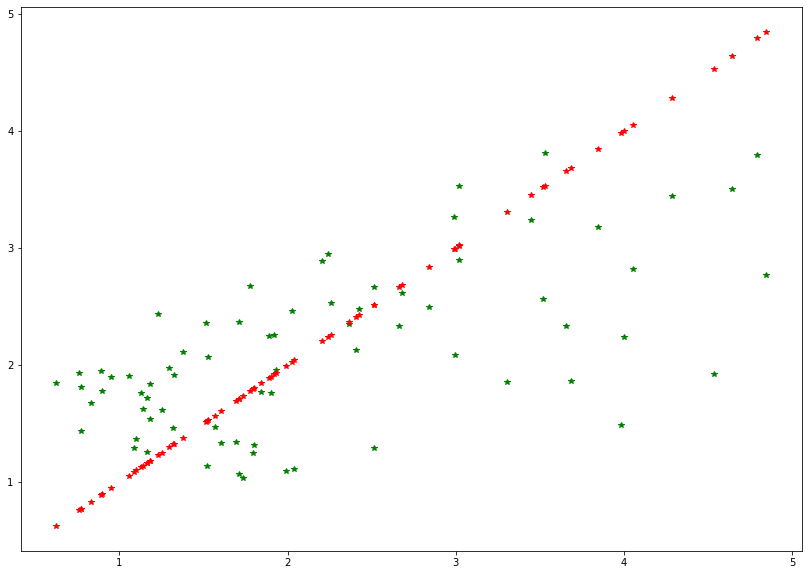

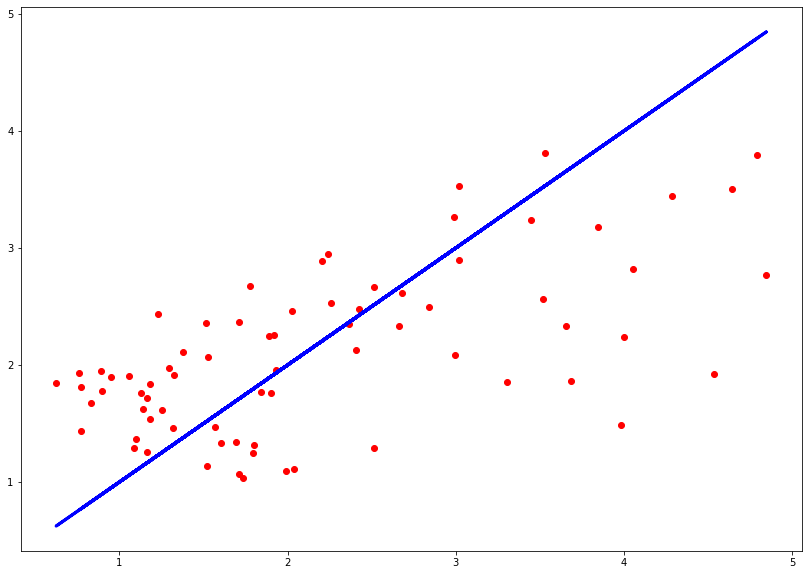

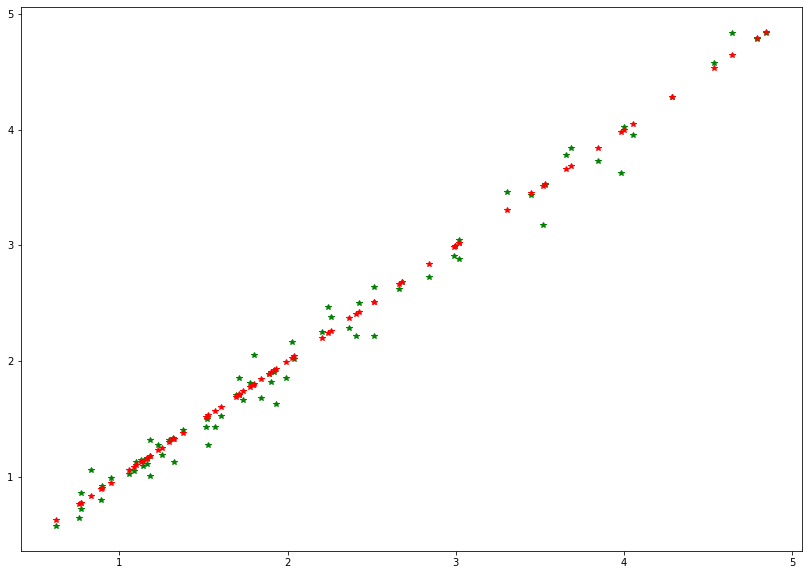

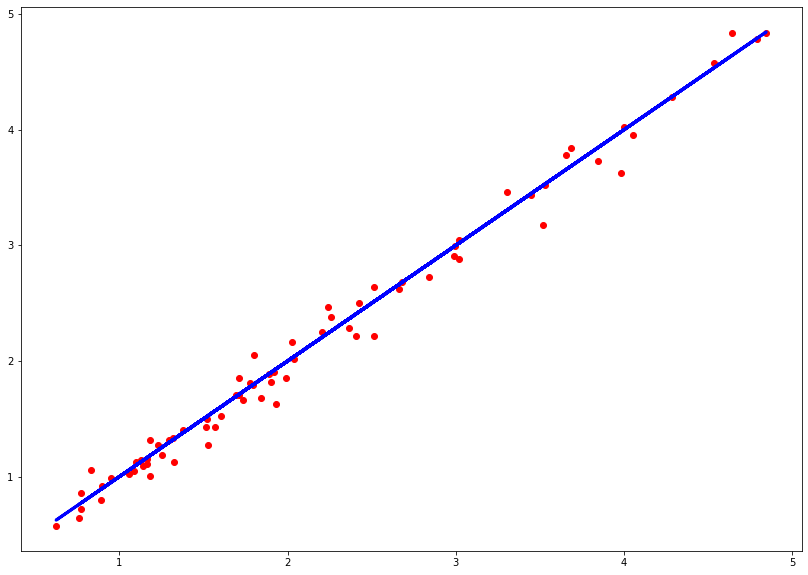

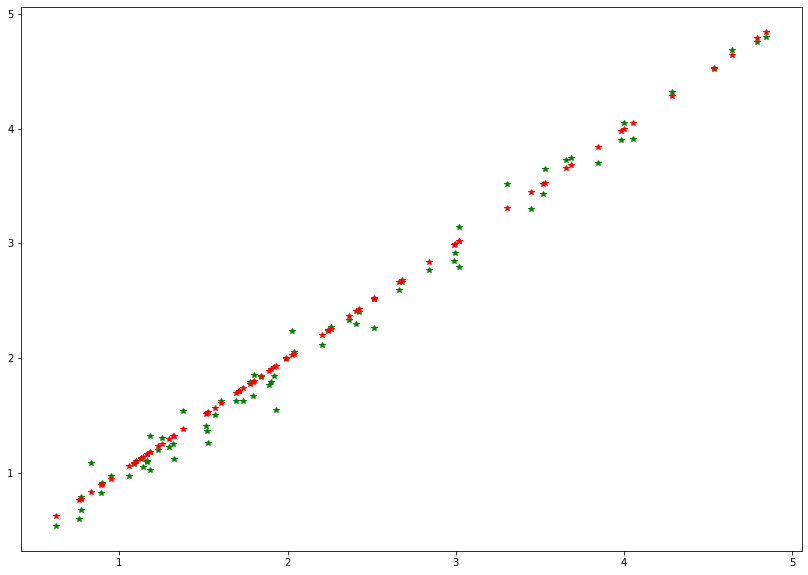

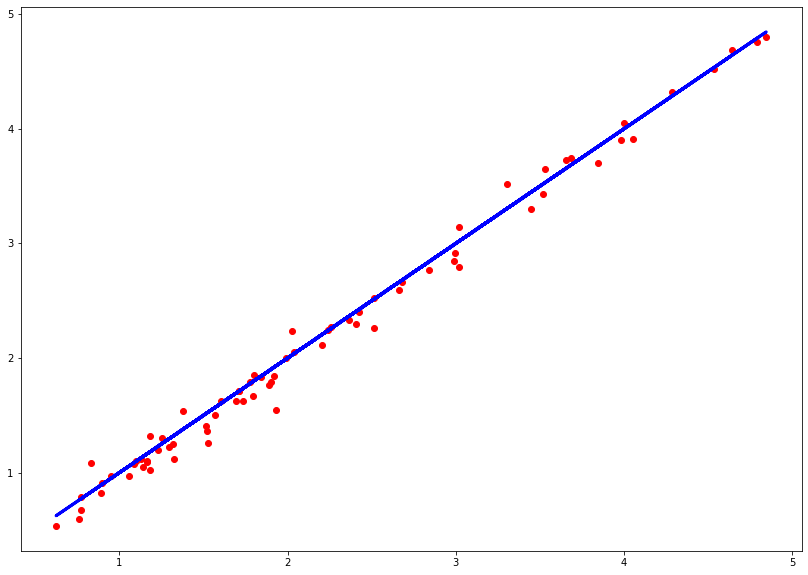

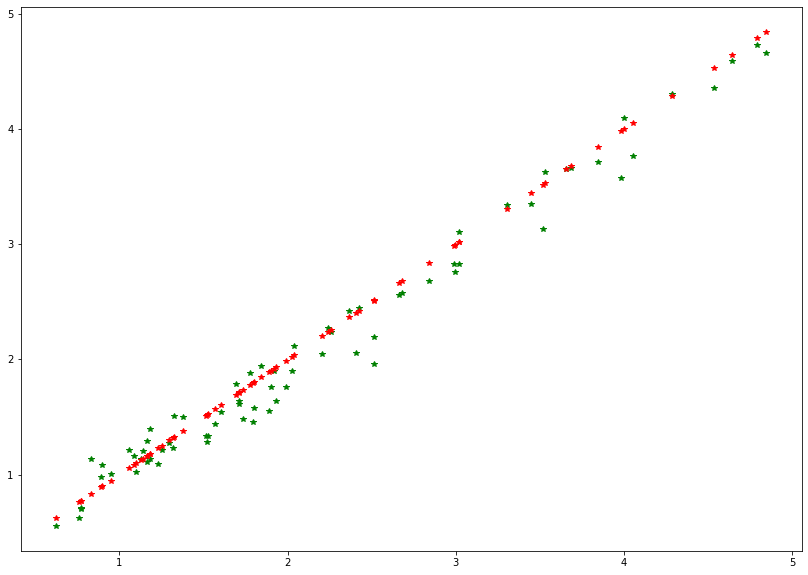

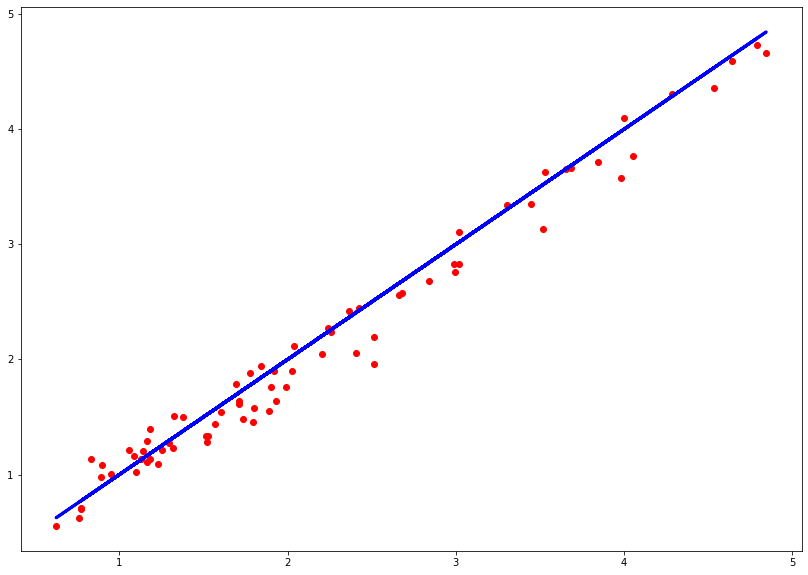

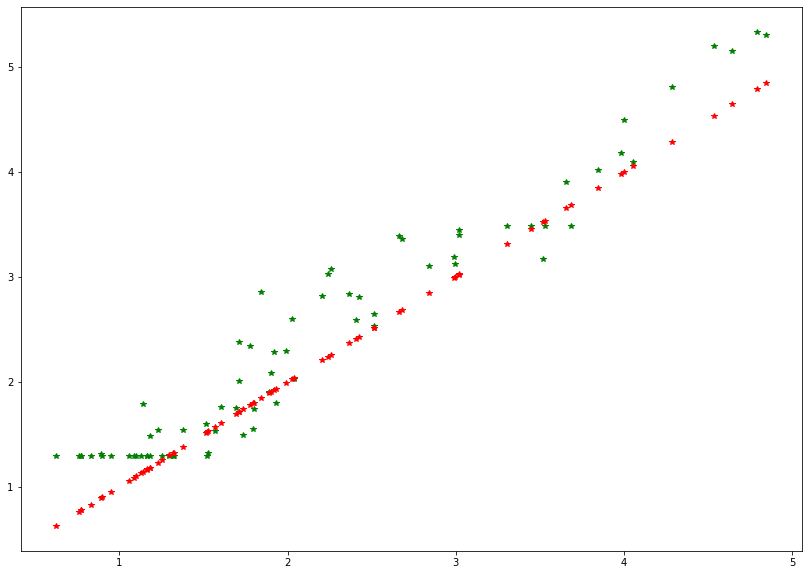

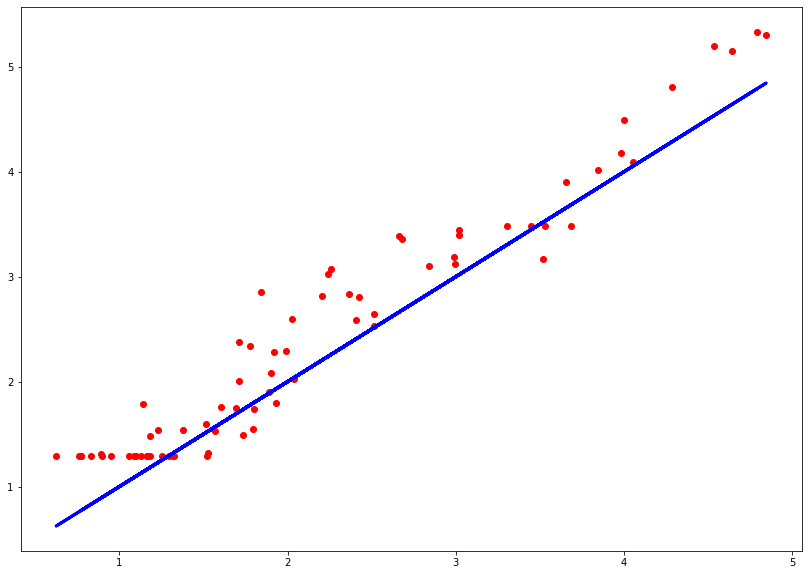

<Figure size 1008x720 with 0 Axes>

In [23]:
print('RMSprop Optimizer Results')

rmsprop_com_time = []

for x_rate in lr_rate:
  
  start_time = time.time()
  rmsprop_history  = build_model(optimizer=tf.train.RMSPropOptimizer(learning_rate=x_rate))
  completion_time = time.time() - start_time
  rmsprop_com_time.append(completion_time)


In [ ]:
print('Adadelta Optimizer Results')

adadelta_com_time = []

for x_rate in lr_rate:
  
  start_time = time.time()
  adadelta_history  = build_model(optimizer=tf.train.AdadeltaOptimizer(learning_rate=x_rate))
  
  completion_time = time.time() - start_time
  adadelta_com_time.append(completion_time)


Streaming output truncated to the last 5000 lines.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 29600...
INFO:tensorflow:Saving checkpoints for 29600 into /tmp/tmpjymilw4a/model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 29600...
INFO:tensorflow:loss = 2926.185, step = 29601
INFO:tensorflow:global_step/sec: 199.26
INFO:tensorflow:loss = 2568.791, step = 29701 (0.503 sec)
INFO:tensorflow:global_step/sec: 203.222
INFO:tensorflow:loss = 2732.758, step = 29801 (0.492 sec)
INFO:tensorflow:global_step/sec: 204.489
INFO:tensorflow:loss = 2946.2095, step = 29901 (0.499 sec)
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 30000...
INFO:tensorflow:Saving checkpoints for 30000 into /tmp/tmpjymilw4a/model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 30000...
INFO:tensorflow:Loss for final step: 2799.6682.
INFO:tensorflow:Calling model_fn.
INFO:ten

In [ ]:

print('Momentum Optimizer Results')

momentum_com_time = []

lr_rate_1 = [0.000001,0.00001,0.0001,0.001,0.1]

for x_rate in lr_rate_1:
  
  start_time = time.time()
  momentum_history  = build_model(optimizer=tf.compat.v1.train.MomentumOptimizer(learning_rate=0.0001,momentum=0.1))
  completion_time = time.time() - start_time
  momentum_com_time.append(completion_time)


In [ ]:
plt.figure(figsize=(9,8))

plt.plot(com_time)
plt.plot(adagrad_com_time)
plt.plot(rmsprop_com_time)
plt.plot(adadelta_com_time)
plt.plot(sgd_com_time)


values =[0.000001,0.00001,0.0001,0.001,0.1,1,10]
x= [0,1,2,3,4,5,6]

plt.ylabel('Time-seconds')
plt.xlabel('Learning_rate')
plt.xticks(x,values)
plt.legend(['Adam','Adagrad','Rmsprop','Adadelts','Sgd'], loc='upper left')
